# Capstone Project
Regresi Problem using Deep Neural Network Architecture

Input :
- Gula Harian : Float
- Jenis Kelamin : laki-laki/perempuan
- riwayat diabetes : iya/tidak
- umur : int
- berat badan : int

Model's Metrics
- loss: 0.0011
- val_loss: 0.0012
- mean_absolute_error: 0.0263
- val_mean_absolute_error: 0.0268

## Inisiasi

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

## Load Data

In [ ]:
df = pd.read_csv('batas_gula_harian.csv')

In [ ]:
df.head(5)

,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas,Umur,Berat Badan,Batas Gula Harian (gram)
0,Perempuan,Iya,Tinggi,60,66,34.4
1,Laki-laki,Tidak,Sedang,20,100,57.0
2,Perempuan,Iya,Rendah,75,76,15.4
3,Perempuan,Tidak,Sedang,35,91,46.9
4,Perempuan,Tidak,Tinggi,75,114,46.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jenis Kelamin             10000 non-null  object 
 1   Riwayat Diabetes          10000 non-null  object 
 2   Tingkat Aktivitas         10000 non-null  object 
 3   Umur                      10000 non-null  int64  
 4   Berat Badan               10000 non-null  int64  
 5   Batas Gula Harian (gram)  10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Umur,Berat Badan,Batas Gula Harian (gram)
count,10000.000000,10000.000000,10000.000000
mean,48.403300,79.763000,41.753100
std,17.864007,23.048335,13.234223
min,18.000000,40.000000,10.800000
25%,33.000000,60.000000,31.700000
50%,48.000000,80.000000,41.700000
75%,64.000000,100.000000,51.800000
max,79.000000,119.000000,73.000000


## Data Transformation

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'Laki-laki':1,'Perempuan':0})
df['Riwayat Diabetes'] = df['Riwayat Diabetes'].map({'Iya':1,'Tidak':0})

In [ ]:
df.head(3)

,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas,Umur,Berat Badan,Batas Gula Harian (gram)
0,0,1,Tinggi,60,66,34.4
1,1,0,Sedang,20,100,57.0
2,0,1,Rendah,75,76,15.4


In [ ]:
df['Berat Badan'] = pd.cut(df['Berat Badan'],[0,40,60,80,120])

In [ ]:
df['Umur'] = pd.cut(df['Umur'],[0,20,60,80],labels=['remaja','dewasa','lansia'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Jenis Kelamin             10000 non-null  int64   
 1   Riwayat Diabetes          10000 non-null  int64   
 2   Tingkat Aktivitas         10000 non-null  object  
 3   Umur                      10000 non-null  category
 4   Berat Badan               10000 non-null  category
 5   Batas Gula Harian (gram)  10000 non-null  float64 
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 332.5+ KB


In [ ]:
df.head()

,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas,Umur,Berat Badan,Batas Gula Harian (gram)
0,0,1,Tinggi,dewasa,"(60, 80]",34.4
1,1,0,Sedang,remaja,"(80, 120]",57.0
2,0,1,Rendah,lansia,"(60, 80]",15.4
3,0,0,Sedang,dewasa,"(80, 120]",46.9
4,0,0,Tinggi,lansia,"(80, 120]",46.6


In [ ]:
df = pd.get_dummies(df,columns=['Tingkat Aktivitas','Umur','Berat Badan'])

In [ ]:
df = df.astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Jenis Kelamin             10000 non-null  float64
 1   Riwayat Diabetes          10000 non-null  float64
 2   Batas Gula Harian (gram)  10000 non-null  float64
 3   Tingkat Aktivitas_Rendah  10000 non-null  float64
 4   Tingkat Aktivitas_Sedang  10000 non-null  float64
 5   Tingkat Aktivitas_Tinggi  10000 non-null  float64
 6   Umur_remaja               10000 non-null  float64
 7   Umur_dewasa               10000 non-null  float64
 8   Umur_lansia               10000 non-null  float64
 9   Berat Badan_(0, 40]       10000 non-null  float64
 10  Berat Badan_(40, 60]      10000 non-null  float64
 11  Berat Badan_(60, 80]      10000 non-null  float64
 12  Berat Badan_(80, 120]     10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


In [ ]:
df.head()

,Jenis Kelamin,Riwayat Diabetes,Batas Gula Harian (gram),Tingkat Aktivitas_Rendah,Tingkat Aktivitas_Sedang,Tingkat Aktivitas_Tinggi,Umur_remaja,Umur_dewasa,Umur_lansia,"Berat Badan_(0, 40]","Berat Badan_(40, 60]","Berat Badan_(60, 80]","Berat Badan_(80, 120]"
0,0.0,1.0,34.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,57.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,15.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,46.9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,46.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
max_batasgula = df['Batas Gula Harian (gram)'].max()
min_batasgula = df['Batas Gula Harian (gram)'].min()

In [ ]:
min_batasgula

10.8

In [ ]:
(df['Batas Gula Harian (gram)']-df['Batas Gula Harian (gram)'].min())/(df['Batas Gula Harian (gram)'].max()-df['Batas Gula Harian (gram)'].min())

,Batas Gula Harian (gram)
0,0.379421
1,0.742765
2,0.073955
3,0.580386
4,0.575563
...,...
9995,0.336013
9996,0.456592
9997,0.292605
9998,0.935691


In [ ]:
df['Batas Gula Harian (gram)'] = (df['Batas Gula Harian (gram)']-df['Batas Gula Harian (gram)'].min())/(df['Batas Gula Harian (gram)'].max()-df['Batas Gula Harian (gram)'].min())

In [ ]:
# kalo mau reverse ini formulnya
#
# reversing min max scaler
# df['Batas Gula Harian (gram)']*(max_batasgula-min_batasgula)+min_batasgula

,Batas Gula Harian (gram)
0,34.4
1,57.0
2,15.4
3,46.9
4,46.6
...,...
9995,31.7
9996,39.2
9997,29.0
9998,69.0


In [ ]:
df.describe()

,Jenis Kelamin,Riwayat Diabetes,Batas Gula Harian (gram),Tingkat Aktivitas_Rendah,Tingkat Aktivitas_Sedang,Tingkat Aktivitas_Tinggi,Umur_remaja,Umur_dewasa,Umur_lansia,"Berat Badan_(0, 40]","Berat Badan_(40, 60]","Berat Badan_(60, 80]","Berat Badan_(80, 120]"
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498700,0.500700,0.497638,0.328400,0.338800,0.332800,0.046800,0.648400,0.304800,0.010800,0.244100,0.253600,0.491500
std,0.500023,0.500025,0.212769,0.469655,0.473325,0.471239,0.211221,0.477494,0.460346,0.103366,0.429574,0.435093,0.499953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.336013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.496785,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.659164,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Post Transformation

In [ ]:
target_np = df.pop('Batas Gula Harian (gram)').values
dataset_np = df.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_np, target_np, test_size=0.3)

In [ ]:
X_train.shape

(7000, 12)

In [ ]:
y_test = np.reshape(y_test,(y_test.shape[0],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
y_train.shape

(7000, 1)

In [ ]:
NUM_FEATURES = X_train.shape[1]
NUM_TRAIN_DATA = X_train.shape[0]
NUM_TEST_DATA = X_test.shape[0]

In [ ]:
print(f'Jumlah Feature: {NUM_FEATURES}\nJumlah Train Dataset: {NUM_TRAIN_DATA}\nJumlah Test Dataset: {NUM_TEST_DATA}')

Jumlah Feature: 12
Jumlah Train Dataset: 7000
Jumlah Test Dataset: 3000


## Pembuatan Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(NUM_FEATURES,)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3640 - mean_absolute_error: 0.3192 - val_loss: 0.1628 - val_mean_absolute_error: 0.0841
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1457 - mean_absolute_error: 0.0611 - val_loss: 0.1059 - val_mean_absolute_error: 0.0330
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0962 - mean_absolute_error: 0.0316 - val_loss: 0.0707 - val_mean_absolute_error: 0.0302
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0642 - mean_absolute_error: 0.0295 - val_loss: 0.0472 - val_mean_absolute_error: 0.0289
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0428 - mean_absolute_error: 0.0280 - val_loss: 0.0317 - val_mean_absolute_error: 0.0279
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0289 - mean_absolute_error: 0.0276 - val_loss: 0.0216 - val_mean_absolute_error: 0.0272
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0269 - val_loss

## Evaluasi Model

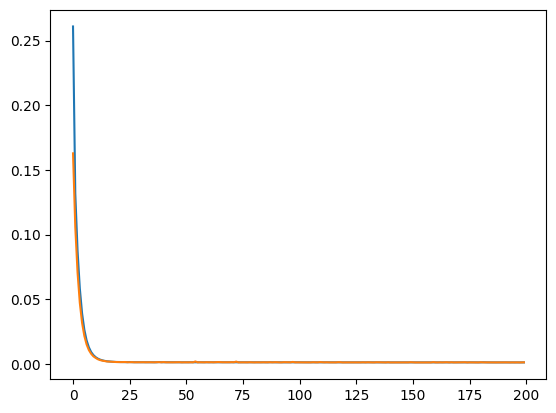

In [ ]:
plt.plot(np.arange(len(history.history['loss'])),history.history['loss'])
plt.plot(np.arange(len(history.history['val_loss'])),history.history['val_loss'])
plt.show()


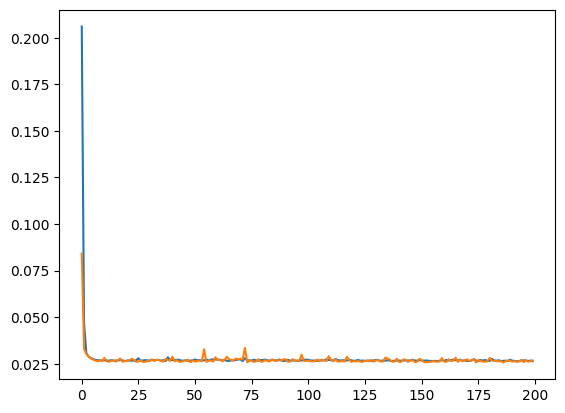

In [ ]:
plt.plot(np.arange(len(history.history['mean_absolute_error'])),history.history['mean_absolute_error'])
plt.plot(np.arange(len(history.history['val_mean_absolute_error'])),history.history['val_mean_absolute_error'])
plt.show()


In [ ]:
y_train[:5]

array([[0.03536977],
       [0.17202572],
       [0.50643087],
       [0.27009646],
       [0.19131833]])

In [ ]:
model.predict(X_train[:5]) * (max_batasgula-min_batasgula) + min_batasgula

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[14.646086],
       [24.528297],
       [45.63931 ],
       [25.819036],
       [20.584635]], dtype=float32)

In [ ]:
y_train[:5] * (max_batasgula-min_batasgula) + min_batasgula

array([[13. ],
       [21.5],
       [42.3],
       [27.6],
       [22.7]])

## Menyimpan Model

In [ ]:
model.save('model_regresi.keras')

In [ ]:
model.predict(X_train[0].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.06183417]], dtype=float32)